# Visualization of Scan Benchmark Results

Should the plots be saved as PDF?

In [1]:
save_plots = True

### Define functions for scatter plots

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def get_df(filename):
    #df = pd.read_csv(filename, names = ['ColumnType', 'Index', 'Operation', 'Value', 'RowCount', 'RowSizeMB', 'Selectivity', 'DurationMS', 'BandwidthGBs'])
    df = pd.read_csv(filename)
    return df

def get_powered_distinct_df(filename):
    df = get_df(filename)
    
    # add distinct values column
    powers = [ 2**i for i in range(0, df.shape[0]) ]
    return df.assign(DistinctValues=powers)


def get_scatter_plot(df, axes, title=''):
    # sort by x axis
    df = df.sort_values(axes['x'])
    
    # show duration in milliseconds
    df.AvgDuration = 0.001 * df.AvgDuration
    
    fig = plt.figure()
    plt.scatter(df[axes['x']], df[axes['y']], marker='x')
    plt.xlabel(axes['x_label'])
    plt.ylabel(axes['y_label'])
    plt.suptitle(title)
    plt.grid(b=True)
    #plt.ylim(bottom=0)
    plt.xlim(left=-0.01, right=1.01)

    return fig


def get_comparing_scatter_plot(df1, df2, df1_label, df2_label, axes, title):
    # sort by x axis
    df1 = df1.sort_values(axes['x'])
    df2 = df2.sort_values(axes['x'])
    
    # show duration in milliseconds
    df1.AvgDuration = 0.001 * df1.AvgDuration
    df2.AvgDuration = 0.001 * df2.AvgDuration
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(df1[axes['x']], df1[axes['y']], marker='o', color='green', label=df1_label)
    ax1.scatter(df2[axes['x']], df2[axes['y']], marker='x', color='blue', label=df2_label)
    plt.xlabel(axes['x_label'])
    plt.ylabel(axes['y_label'])
    plt.suptitle(title)
    plt.grid(b=True)
    #plt.ylim(bottom=0)
    plt.xlim(left=-0.01, right=1.01)
    fig.legend(loc=7)
    fig.subplots_adjust(right=0.75)   

    return fig

def get_three_comparing_scatter_plot(x, y1, y2, y3, df1_label, df2_label, df3_label, axes, title):
    # show duration in milliseconds
    y1 = [ i * 0.001 for i in y1 ]
    y2 = [ i * 0.001 for i in y2 ]
    y3 = [ i * 0.001 for i in y3 ]
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(x, y1, marker='s', color='orange', label=df1_label)
    ax1.scatter(x, y2, marker='o', color='green', label=df2_label)
    ax1.scatter(x, y3, marker='x', color='blue', label=df3_label)
    plt.xlabel(axes['x_label'])
    plt.ylabel(axes['y_label'])
    plt.suptitle(title)
    plt.grid(b=True)
    #plt.ylim(bottom=0)
    plt.xlim(left=-0.01, right=1.01)
    fig.legend(loc=7)
    fig.subplots_adjust(right=0.75)   

    return fig

def get_mean_durations_per_selectivity(dataframe):
    mean_durations = []
    selectivities = []
    for value in dataframe['selectivity'].unique():
        values = dataframe[dataframe.selectivity == value]
        means = values.mean()
        mean_durations.append(means['duration_microseconds'])
        selectivities.append(means['selectivity'])
    return mean_durations

### Make plots for CSV files

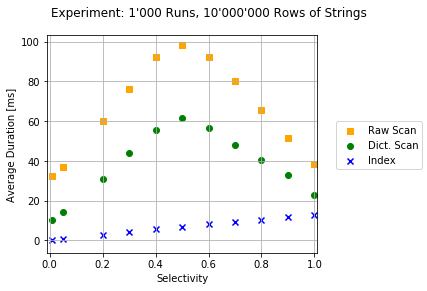

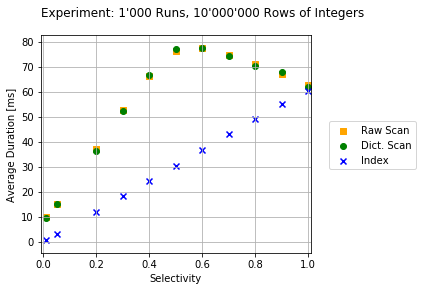

In [8]:
plots = []

axes = {
    'x': 'Selectivity',
    'y': 'AvgDuration',
    'x_label': 'Selectivity', 
    'y_label': 'Average Duration [ms]', 
}
#plots.append(get_scatter_plot(get_powered_distinct_df('./out.csv'), axes, 'Experiment 1: 1\'000 Runs, 10\'000\'000 Rows of Integers'))

#plots.append(get_scatter_plot(get_powered_distinct_df('./1.csv'), axes, 'Experiment 1: 100 Runs, 1\'000\'000 Rows of Integers'))
#plots.append(get_scatter_plot(get_powered_distinct_df('./2.csv'), axes, 'Experiment 2: 100 Runs, 1\'000\'000 Rows of Integers'))
#plots.append(get_scatter_plot(get_powered_distinct_df('./3.csv'), axes, 'Experiment 3: 100 Runs, 1\'000\'000 Rows of Strings'))

df = get_df('./string.csv').sort_values('selectivity', ascending=True)
string_raw = df[df.operation == 0]
string_dict = df[df.operation == 2]
string_index = df[df.operation == 1]
df2 = get_df('./int.csv').sort_values('selectivity', ascending=True)
int_raw = df2[df2.operation == 0]
int_dict = df2[df2.operation == 2]
int_index = df2[df2.operation == 1]

string_raw_mean_durations = get_mean_durations_per_selectivity(string_raw)
string_dict_mean_durations = get_mean_durations_per_selectivity(string_dict)
string_index_mean_durations = get_mean_durations_per_selectivity(string_index)
int_raw_mean_durations = get_mean_durations_per_selectivity(int_raw)
int_dict_mean_durations = get_mean_durations_per_selectivity(int_dict)
int_index_mean_durations = get_mean_durations_per_selectivity(int_index)
string_selectivities = df['selectivity'].unique()
int_selectivities = df2['selectivity'].unique()

plots.append(get_three_comparing_scatter_plot(string_selectivities, string_raw_mean_durations, string_dict_mean_durations, string_index_mean_durations, 'Raw Scan', 'Dict. Scan', 'Index', axes, 'Experiment: 1\'000 Runs, 10\'000\'000 Rows of Strings'))
plots.append(get_three_comparing_scatter_plot(int_selectivities, int_raw_mean_durations, int_dict_mean_durations, int_index_mean_durations, 'Raw Scan', 'Dict. Scan', 'Index', axes, 'Experiment: 1\'000 Runs, 10\'000\'000 Rows of Integers'))


### Save plots if requested

In [9]:
if save_plots: 
    with PdfPages("plots week 3.pdf") as pdf:
        for plot in plots:
            pdf.savefig(plot)